In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib


df = pd.read_csv("../athlete_events.csv")
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [32]:
df_anonym = df.copy()
df_anonym["Name"] = df_anonym["Name"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

print(df_anonym)

            ID                                               Name Sex   Age  \
0            1  3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...   M  24.0   
1            2  a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...   M  23.0   
2            3  9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...   M  24.0   
3            4  0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...   M  34.0   
4            5  5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...   F  21.0   
...        ...                                                ...  ..   ...   
271111  135569  07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...   M  29.0   
271112  135570  2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...   M  27.0   
271113  135570  2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...   M  27.0   
271114  135571  e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...   M  30.0   
271115  135571  e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...   M  34.0   

        Height  Weight            Team  NOC        

In [33]:
medaljer_tyskland = df_anonym[df_anonym["NOC"] == "GER"].groupby("Sport")["Medal"].value_counts().sort_values(ascending=False)
print(medaljer_tyskland.head(3))

Sport     Medal 
Rowing    Gold      105
Swimming  Bronze     80
Hockey    Bronze     79
Name: count, dtype: int64


In [34]:
tyskland_medaljer = df_anonym[df_anonym["NOC"] == "GER"]
tyskland_medaljer_per_lag = tyskland_medaljer.groupby(["Event", "Games"])["Medal"].nunique()
print(tyskland_medaljer_per_lag)

Event                                           Games      
Alpine Skiing Men's Combined                    1936 Winter    2
                                                1992 Winter    0
                                                1994 Winter    0
                                                2010 Winter    0
Alpine Skiing Men's Downhill                    1952 Winter    0
                                                              ..
Wrestling Women's Heavyweight, Freestyle        2008 Summer    0
                                                2016 Summer    0
Wrestling Women's Light-Heavyweight, Freestyle  2016 Summer    0
Wrestling Women's Lightweight, Freestyle        2016 Summer    0
Wrestling Women's Middleweight, Freestyle       2004 Summer    0
Name: Medal, Length: 3226, dtype: int64


In [35]:
tyskland_medaljer = df_anonym[df_anonym["NOC"] == "GER"]
tyskland_medaljer_per_sport = tyskland_medaljer.groupby("Sport")["Medal"].value_counts()
print(tyskland_medaljer_per_sport)

Sport          Medal 
Alpine Skiing  Gold      14
               Bronze     9
               Silver     8
Alpinism       Gold       2
Archery        Silver     4
                         ..
Weightlifting  Silver     7
               Gold       6
Wrestling      Silver    18
               Bronze    12
               Gold       5
Name: count, Length: 114, dtype: int64


## Beräkna utvecklingen för respektive land

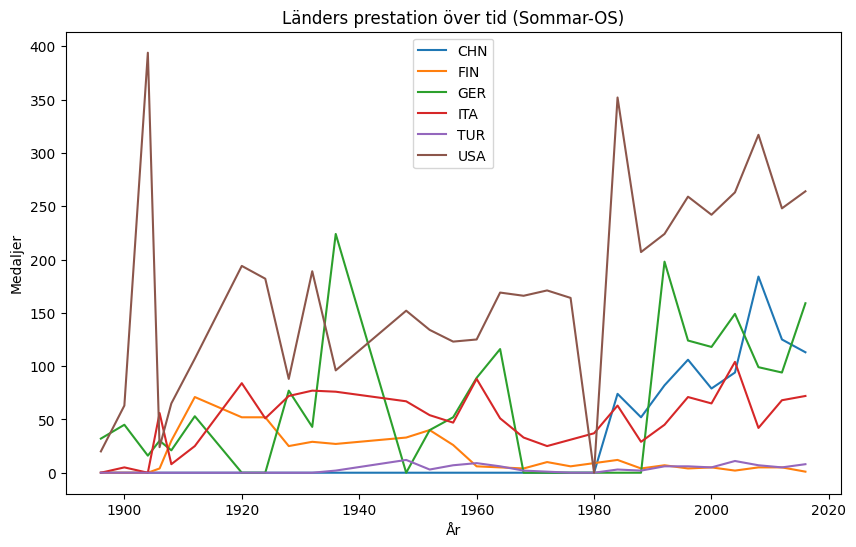

In [36]:
lander_prestation_over_tid = df[(df['NOC'].isin(['GER', 'ITA', 'TUR', 'CHN', 'USA', 'FIN'])) & (df['Season'] == "Summer")].groupby(["NOC", "Year"])["Medal"].count().unstack().fillna(0)

plt.figure(figsize=(10,6))
for noc in lander_prestation_over_tid.index:
    noc_data = lander_prestation_over_tid.loc[noc]
    plt.plot(noc_data.index, noc_data.values, label=noc)
plt.xlabel("År")
plt.ylabel("Medaljer")
plt.title("Länders prestation över tid (Sommar-OS)")
plt.legend()
plt.show()

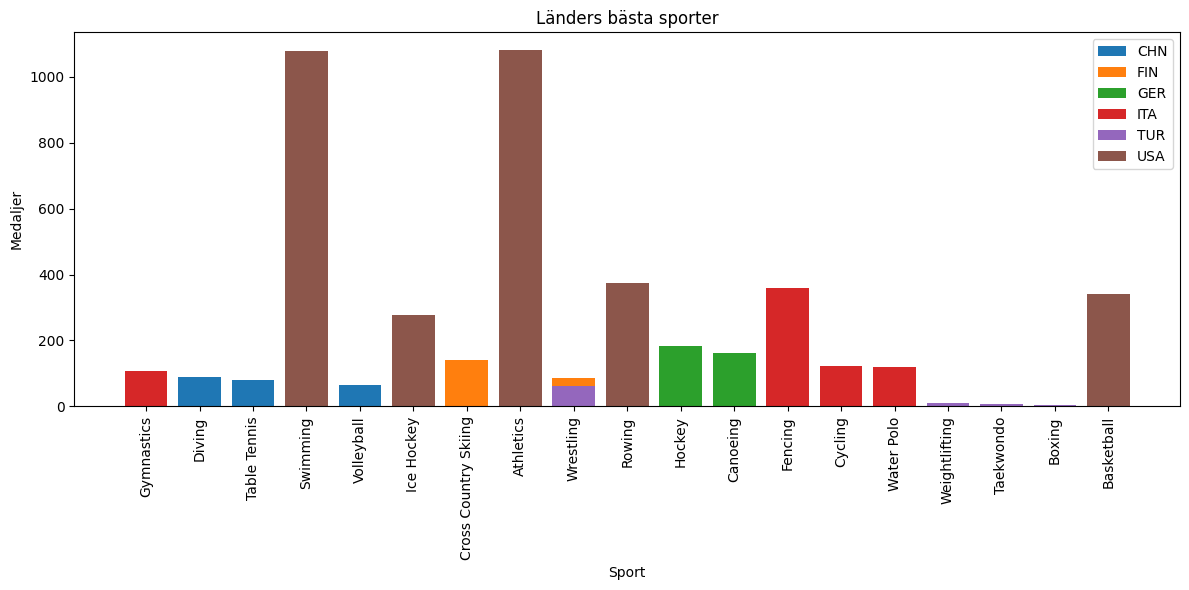

In [37]:
lander_sporter = df[df['NOC'].isin(['GER', 'ITA', 'TUR', 'CHN', 'USA', 'FIN'])].groupby(["NOC", "Sport"])["Medal"].count().unstack().fillna(0)
plt.figure(figsize=(12,6))
for noc in lander_sporter.index:
    noc_data = lander_sporter.loc[noc]
    top_sporter = noc_data.nlargest(5)
    plt.bar(top_sporter.index, top_sporter.values, label=noc)
plt.xlabel("Sport")
plt.ylabel("Medaljer")
plt.title("Länders bästa sporter")
plt.legend()
plt.xticks(rotation=90)  # Rotera x-axeln 90 grader
plt.tight_layout()  # Anpassa layouten så att allt får plats
plt.show()

In [38]:
df_anonym

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [47]:
# Beräkna antalet medaljer per lag
df_anonym['Medaljer_per_lag'] = df_anonym.groupby('Event')['Medal'].transform('nunique')

# Gruppera medaljerna efter land och sport
lander_sporter = df_anonym.groupby(["NOC", "Sport"])["Medaljer_per_lag"].sum().unstack().fillna(0)

# Filtrera ut länder som inte har några medaljer
lander_sporter = lander_sporter.dropna(how="all")

lander_sporter

Sport,Aeronautics,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
NOC,,,,,,,,,,,,,,,,,,,,,
AFG,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0
AHO,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,33.0,0.0
ALB,0.0,21.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,12.0
ALG,0.0,30.0,0.0,0.0,0.0,417.0,3.0,0.0,0.0,0.0,...,30.0,3.0,6.0,3.0,0.0,0.0,93.0,0.0,57.0,57.0
AND,0.0,315.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
YMD,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YUG,0.0,450.0,0.0,6.0,36.0,585.0,0.0,0.0,396.0,0.0,...,27.0,0.0,18.0,0.0,0.0,0.0,36.0,366.0,12.0,237.0
